Zadanie będzie składało się z trzech części: 

W pierwszej części chcielibyśmy abyś skupił/a się na przygotowaniu danych oraz jej analizie.
Następnym krokiem będzie stworzenie modelu predykcyjnego zmiennej outcome.
Ostatnim krokiem będzie wizualizacja danych i prezentacja wyników.

In [66]:
#Analiza danych 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset_zadanie.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,122,90,51,220,49.7,0.325,31,1
1,1,163,72,0,0,39.0,1.222,33,1
2,1,151,60,0,0,26.1,0.179,22,0
3,0,125,96,0,0,22.5,0.262,21,0
4,1,81,72,18,40,26.6,0.283,24,0


In [67]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,3.831776,121.255007,69.194927,20.520694,80.444593,32.060347,0.475762,33.295060,0.353805
std,3.353664,32.082245,19.308138,15.996195,116.161819,7.794271,0.333055,11.780626,0.478469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.100000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


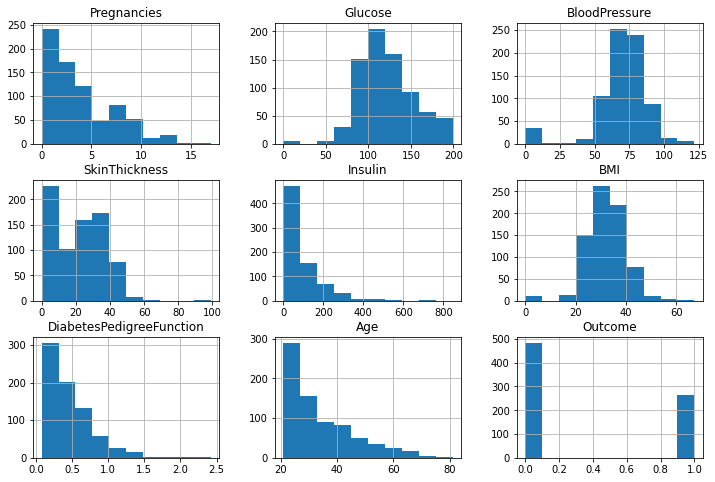

In [69]:
df.hist(figsize=(12,8))
plt.show()

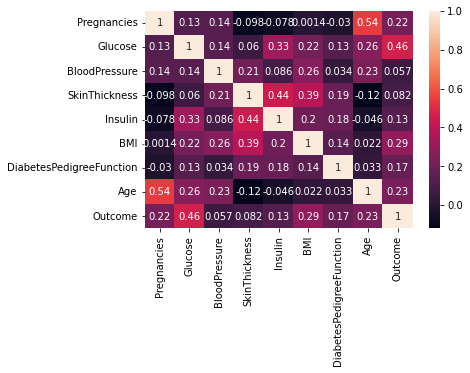

In [70]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Wnioski z analizy danych:
1. Zbiór danych jest pozornie kompletny.
2. Dla zmiennych Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI brakujące informacje mają wartość 0.
3. Dlatego należy zastąpić je medianą lub usunąć.


In [71]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df = df[(df[columns_to_check] != 0).all(axis=1)]
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1      122             90             51      220  49.7   
4              1       81             72             18       40  26.6   
6              1      126             56             29      152  28.7   
8              4      144             58             28      140  29.5   
9              3       83             58             31       18  34.3   
..           ...      ...            ...            ...      ...   ...   
737            1       95             66             13       38  19.6   
738            4      146             85             27      100  28.9   
739            2      100             66             20       90  32.9   
740            5      139             64             35      140  28.6   
742            4      129             86             20      270  35.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.325   31        1  
4                  

In [72]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,3.251309,123.002618,70.680628,29.227749,157.437173,33.104974,0.525374,30.850785,0.337696
std,3.175478,30.900781,12.525149,10.578191,119.747525,7.026881,0.347961,10.248679,0.473545
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,78.250000,28.400000,0.270250,23.000000,0.000000
50%,2.000000,119.500000,70.000000,29.000000,126.500000,33.200000,0.452000,27.000000,0.000000
75%,5.000000,143.750000,78.000000,37.000000,190.750000,37.075000,0.685750,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


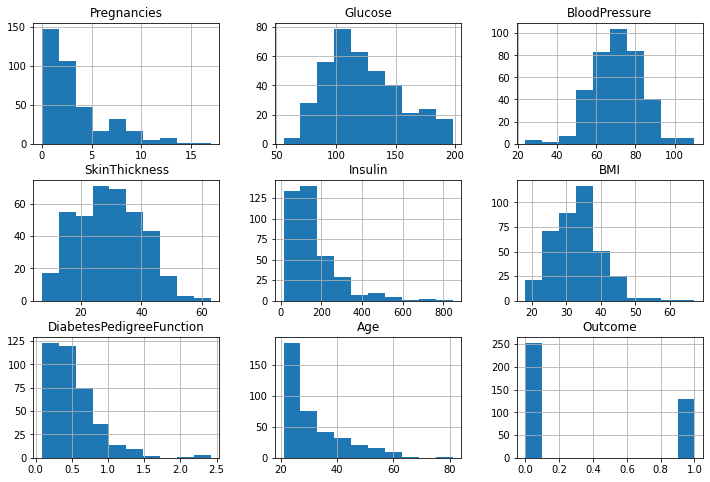

In [73]:
df.hist(figsize=(12,8))
plt.show()

In [74]:
#Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score


data = df


X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegressionCV(penalty='l2')


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8181818181818182


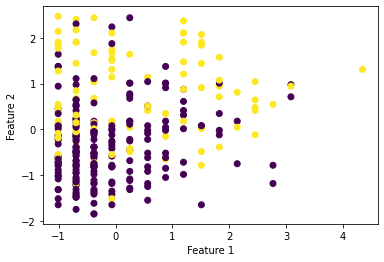

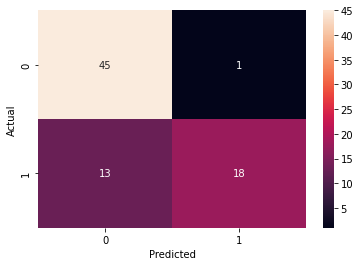

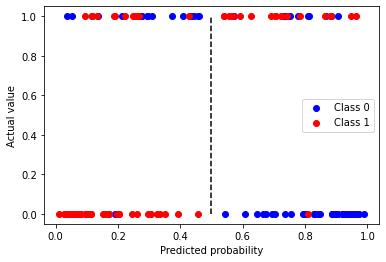

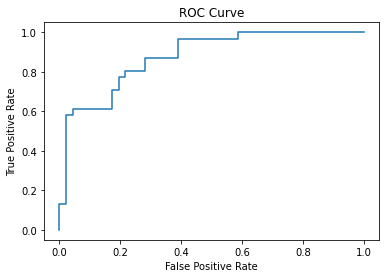

In [75]:
#Wizualizacja


import matplotlib.pyplot as plt
import seaborn as sns


plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.metrics import roc_curve


y_prob = model.predict_proba(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])

y_proba = model.predict_proba(X_test)

colors = ['blue', 'red']
for i in range(len(colors)):
    xs = y_proba[:, i]
    ys = y_test
    plt.scatter(xs, ys, c=colors[i])

plt.legend(['Class 0', 'Class 1'])


plt.plot([0.5, 0.5], [0, 1], 'k--')


plt.xlabel('Predicted probability')
plt.ylabel('Actual value')


plt.show()


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()